In [4]:
import pickle
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import os

In [24]:
def evaluate_loss(PATH, tau_eval=None):
    """
    PATH: path of the folder containing the output files
    tau_eval: list of tau values to evaluate the loss by tau. If None, all tau values are considered.
    """

    with (open(os.path.join(PATH, 'tau.pkl'), 'rb') as f1,
          open(os.path.join(PATH, 'design_loss.pkl'), 'rb') as f2,
          open(os.path.join(PATH, 'arguments.pkl'), 'rb') as f3,
          open(os.path.join(PATH, 'bf_loss.pkl'), 'rb') as f4):
        
        tau = pickle.load(f1)
        design_loss = pickle.load(f2)
        args_dict = pickle.load(f3)
        bf_loss = pickle.load(f4)["loss"]
   
    n_steps_1 = args_dict["epochs_1"] * args_dict["steps_per_epoch_1"]
    n_steps_2 = args_dict["epochs_2"] * args_dict["steps_per_epoch_2"]
    n_steps_3 = args_dict["epochs_3"] * args_dict["steps_per_epoch_3"]

    dad = args_dict["dad"]

    if dad == "first":
        fig, axs = plt.subplots(2, figsize=(8, 6))
        axs[0].plot(range(n_steps_1), design_loss[0:n_steps_1], color = "#791F1F")
        axs[0].set_title("Loss for Policy network")
        axs[0].set_xlabel('Steps')
        axs[0].set_ylabel('Loss value')

        axs[1].plot(range(args_dict["epochs_2"]), bf_loss[0:args_dict["epochs_2"]], color = "#791F1F")
        axs[1].set_title("Loss for BayesFlow")
        axs[1].set_xlabel('Epochs')
        axs[1].set_ylabel('Loss value')

        plt.tight_layout(pad=3.0)

        return fig
        
    else:
        fig = plt.figure(constrained_layout=True, figsize= (12, 8))
        gs = GridSpec(4, 2, figure=fig)
        ax1 = fig.add_subplot(gs[0, 0])
        ax2 = fig.add_subplot(gs[1, 0])
        ax3 = fig.add_subplot(gs[2, 0])
        ax4 = fig.add_subplot(gs[3, 0])
        ax5 = fig.add_subplot(gs[0:2, 1])
        ax6 = fig.add_subplot(gs[2:4, 1])

        ax1.plot(range(args_dict["epochs_1"]), bf_loss[0:args_dict["epochs_1"]], color = "#791F1F")
        ax1.set_title("Loss for BayesFlow (Stage 1)")
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Loss value')

        ax2.plot(range(n_steps_2), design_loss[0:n_steps_2], color = "#791F1F")
        ax2.set_title("Loss for Policy network (Stage 2)")
        ax2.set_xlabel('Steps')
        ax2.set_ylabel('Loss value')

        ax3.plot(range(args_dict["epochs_3"]), bf_loss[args_dict["epochs_1"]:], color = "#791F1F")
        ax3.set_title("Loss for BayesFlow (Stage 3)")
        ax3.set_xlabel('Epochs')
        ax3.set_ylabel('Loss value')

        ax4.plot(range(n_steps_3), design_loss[n_steps_2:], color = "#791F1F")
        ax4.set_title("Loss for Policy network (Stage 3)")
        ax4.set_xlabel('Steps')
        ax4.set_ylabel('Loss value')

        if tau_eval is None:
            tau_eval = range(args_dict["T"])

        for t in tau_eval:
            loss_tau = [design_loss[0:n_steps_2][i] for i in range(n_steps_2) if tau[0:n_steps_2][i] == t]
            ax5.plot(range(len(loss_tau)), loss_tau, label=f"tau={t}")
        ax5.legend()
        ax5.set_title("Loss for Policy network by tau (Stage 2)")

        for t in tau_eval:
            loss_tau = [design_loss[n_steps_2:][i] for i in range(n_steps_3) if tau[n_steps_2:][i] == t]
            ax6.plot(range(len(loss_tau)), loss_tau, label=f"tau={t}")
        ax6.legend()
        ax6.set_title("Loss for Policy network by tau (Stage 3)")
        
        return gs

## DAD only

Train DAD with predictive samples -> Train bayeflow with DAD generating xi -> joint training

it says T=3 but actually T=4..

In [16]:
path = "results/" + "dad_first_t_3_wider_design"

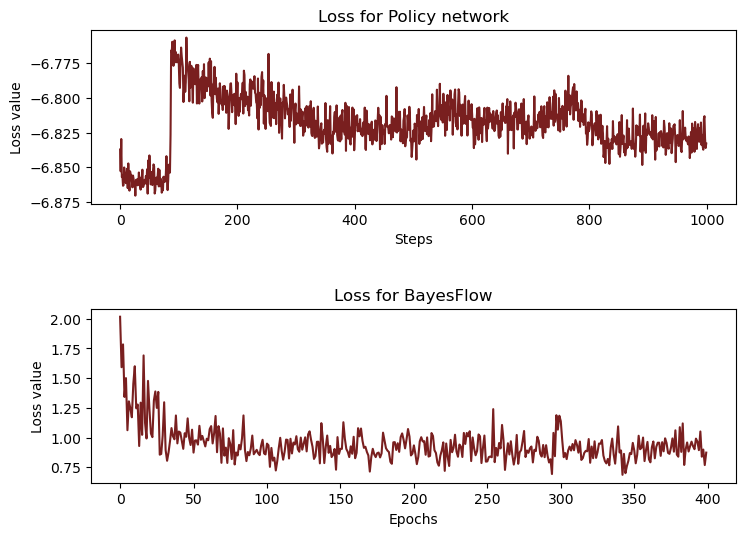

In [17]:
f = evaluate_loss(path)

## DAD second

Train bayesflow with random design -> Train DAD with bayesflow posterior -> joint training

In [18]:
path = "results/" + "dad_second_t_3_wider_design"

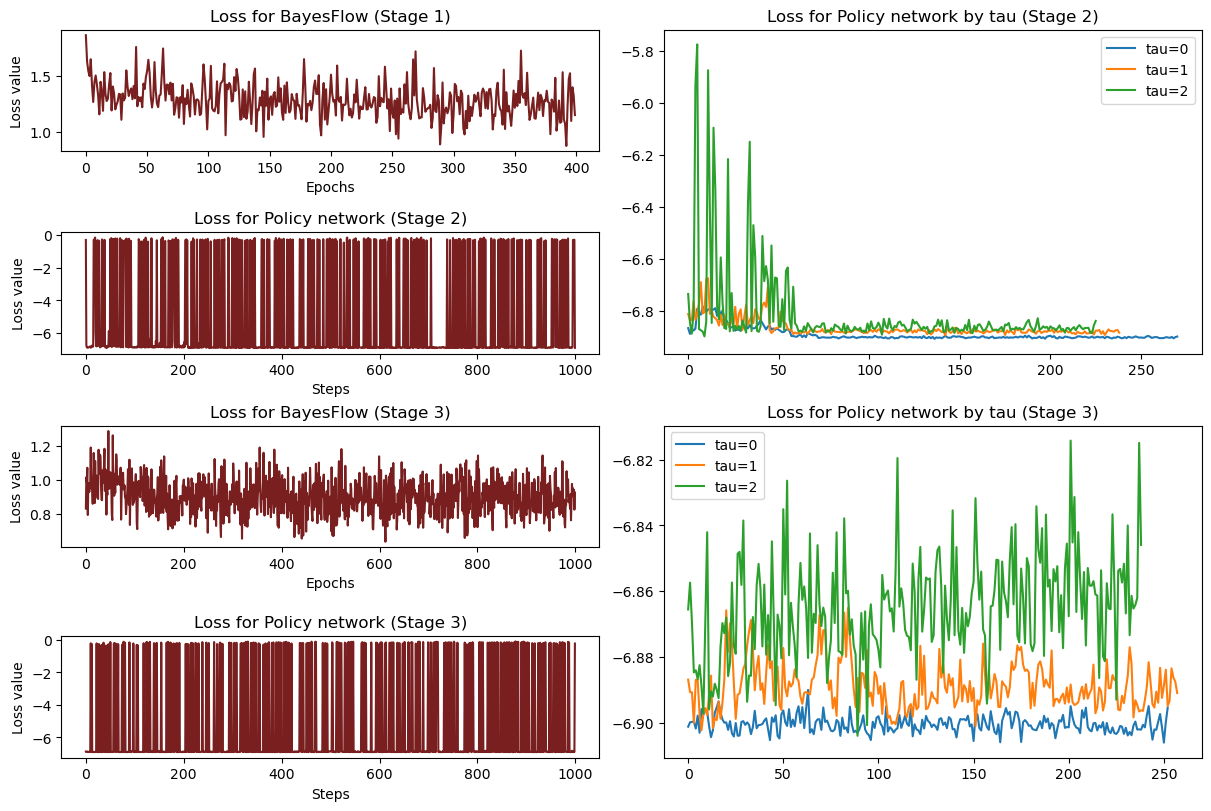

In [23]:
f = evaluate_loss(path, tau_eval=[0, 1, 2])